#Mushroom Project


## In this project we can predict the 'class' of  mushroom(classify as poisonous or unknown edibility considering the various factors of mushroom like cap-shape,gill-spacing,stalk-shape,etc,.

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [61]:
# Use pd.read_csv() to read the file and assign it to variable call "df"
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [62]:
# Look into shape using data.shape(). This will tell me how many rows and columns there are.
print('Number of samples: ', df.shape[0])
print('Number of attributes: ', df.shape[1])

Number of samples:  8124
Number of attributes:  23


In [63]:
#counting the poisonous and edible present in class column

value_counts = df['class'].value_counts()
e = value_counts['e']
p = value_counts['p']

print('\nEdible:    ', e)
print('Poisonous: ', p)
print('\nTotal:     ', e + p)


Edible:     4208
Poisonous:  3916

Total:      8124


### Missing values in the mushroom dataset are identified as ‘?’. Only one variable (stalk-root) appears to contain missing values.

In [64]:
print(df["stalk-root"])

#counting the missing values.
print("\nValues classified as 'Missing' for stalk-root: ", (df.iloc[:,11] == '?').sum())

0       e
1       c
2       c
3       e
4       e
       ..
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, Length: 8124, dtype: object

Values classified as 'Missing' for stalk-root:  2480


In [65]:

#Due to a large number of missing values in stalk-root, this feature can be removed from dataframe

df = df.drop(["stalk-root"],axis=1)

In [66]:
# Now lets see data types using data.dtypes
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [67]:
# Let's calculate the number of null values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [68]:

#statistical summary
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [73]:
#with above summary,we can clearly see that there is only one unique value in "veil-type" column
#so,we can remove that column from dataframe.
df = df.drop(["veil-type"],axis=1)

In [74]:
#Since all attributes are objective type, so we can just apply Label encoder on all of it.

from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)

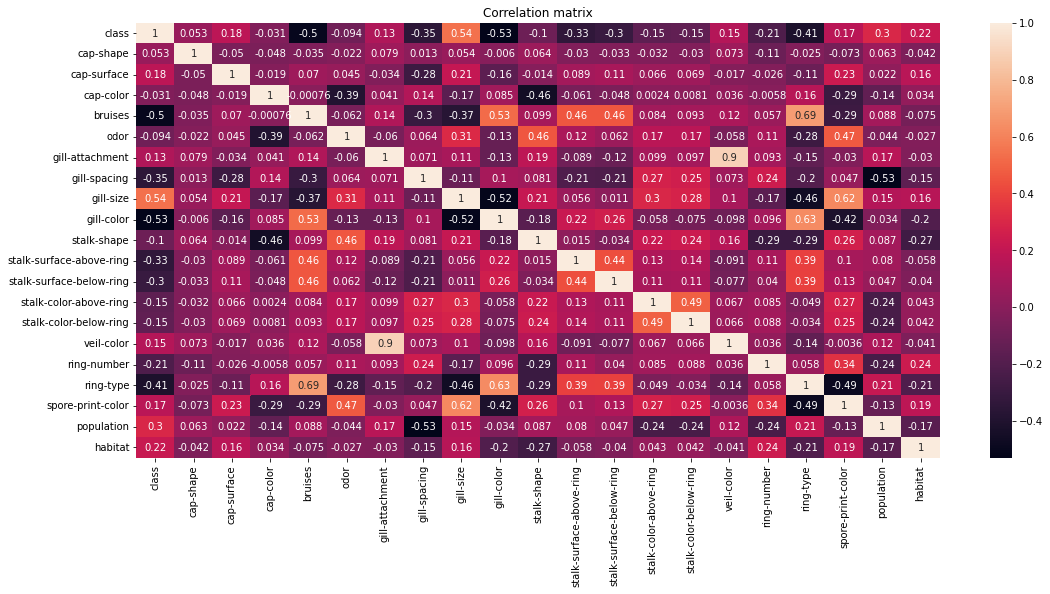

In [75]:
#plotting the correlation matrix

corr_matrix = df.corr()
plt.figure(figsize=[18,8])
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

In [76]:
#Splitting the independent and target variables as x and y respectively

y = df["class"]
x = df.drop(["class"],axis=1)

In [77]:
#checking the skewness

x.skew().sort_values(ascending=False)

ring-number                 2.701657
gill-spacing                1.840088
habitat                     0.985548
gill-size                   0.825797
cap-color                   0.706965
spore-print-color           0.548426
bruises                     0.342750
gill-color                  0.061410
odor                       -0.080790
cap-shape                  -0.247052
stalk-shape                -0.271345
ring-type                  -0.290018
cap-surface                -0.590859
stalk-surface-below-ring   -0.757703
stalk-surface-above-ring   -1.098739
population                 -1.413096
stalk-color-below-ring     -1.791593
stalk-color-above-ring     -1.835434
gill-attachment            -5.977076
veil-color                 -6.946944
dtype: float64

In [78]:
# removing the skewness from power_transform funtion

from sklearn.preprocessing import power_transform
x_n = power_transform(x)

x = pd.DataFrame(x_n,columns=x.columns)
x.skew().sort_values(ascending=False)

veil-color                  5.797742
gill-spacing                1.840088
gill-size                   0.825797
bruises                     0.342750
habitat                     0.123132
spore-print-color           0.018174
cap-color                   0.004059
stalk-surface-below-ring   -0.114150
odor                       -0.144660
cap-shape                  -0.205860
gill-color                 -0.246738
stalk-shape                -0.271345
ring-type                  -0.339232
population                 -0.368219
stalk-surface-above-ring   -0.438332
cap-surface                -0.473764
ring-number                -0.499098
stalk-color-below-ring     -0.925320
stalk-color-above-ring     -0.964471
gill-attachment            -5.977076
dtype: float64

In [86]:
#importing a necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

#Evaluating model performance

# Now data is preprocessed and we can go for selecting best random state
accu_score = 0
maxRS = 0 #best random state value for max accuracy_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = i)
  LR = LogisticRegression()
  LR.fit(x_train,y_train)
  predic = LR.predict(x_test)
  acc = accuracy_score(y_test,predic)
  if acc > accu_score:
    accu_score = acc
    maxRS = i
print("Best accuracy_score is ",accu_score," on Random state ",maxRS)

Best accuracy_score is  0.9587692307692308  on Random state  180


In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = 180)

In [88]:
print(x_train.shape,y_train.shape)

(6499, 20) (6499,)


In [89]:
print(x_test.shape,y_test.shape)

(1625, 20) (1625,)


In [90]:
# To predict the class of mushroom,we can consider Logistic regressiom model
LR = LogisticRegression()
LR.fit(x_train,y_train)
predic = LR.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic)))

accuracy_score is 0.959


In [92]:
#confusion matrix and classification report

print(confusion_matrix(y_test,predic))
print(classification_report(y_test,predic))

[[820  32]
 [ 35 738]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       852
           1       0.96      0.95      0.96       773

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [93]:
#using DecisionTree classifier
from sklearn.tree import DecisionTreeClassifier

DT = LogisticRegression()
DT.fit(x_train,y_train)
predic = DT.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic)))
print(confusion_matrix(y_test,predic))
print(classification_report(y_test,predic))

accuracy_score is 0.959
[[820  32]
 [ 35 738]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       852
           1       0.96      0.95      0.96       773

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



###With this model,we can see that the accuarcy is almost 96% while predicting the class of mushrooms on test dataset
###so,we can conclude that the model well and truely ready for predicting the class for unseen data of the mushroom.